<a href="https://colab.research.google.com/github/1830668NabilahOshin/Numerical-methods-and-Neural-Network-Labwork/blob/main/Completedbyme_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **1. Import necessary packages:**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



#### **2. Upload and load dataset:**
At first we have to upload the dataset to google colab to start working with it. Please download the **"bookprice.csv"** dataset from piazza resourse or [click here](https://piazza.com/class_profile/get_resource/ku1fdd7zhev3r2/ku7c2kiquo514q) to download it. Then click on files form sidebar, drag and drop your file to side bar to upload the dataset.

Now, use `data = pd.read_csv("bookprice.csv")` to load the data.

In [ ]:
data = pd.read_csv("bookprice.csv")
data = data.to_numpy()
print(data)

[[166  54]
 [195  82]
 [200  72]
 [260  72]
 [265  90]
 [335 124]
 [370  94]
 [450 118]
 [517 152]
 [552 132]]


#### **3. Get the size of data.:**
Get the size of `data` using `np.shape(data)`. This will return a tuple consists of number of rows and columns of `data`. Save these into two varible named `row` and `col`.

In [ ]:
row, col = np.shape(data)
print(row, col)

10 2


#### **4. Plot 2D data. X-axis show page, Y-Axis shows price**
Draw a scatter plot using `plt.scatter()`. Keep page in x-axis and price in y-axis. Show xlabel and ylabel using `plt.xlabel('Page')` and `plt.ylabel('Price')`. Put limit of the axis using `plt.xlim(150, 600)` and `plt.ylim(50, 160)`

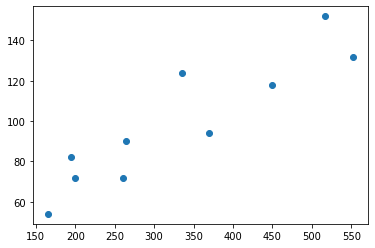

In [ ]:
plt.scatter(data[:,0] , data[:,1])

#### **5. Decide number of groups:**
Let's take number of group `k = 3`

In [ ]:
k=3

#### **6. Take a initial zero matrix called centroids:**
For three group we need three initial centroid. Initially we will take the origin (0, 0) as centroid. Use `np.zeros()` to generate the centroid matrix.

**Note:** The size of the centroid matrix will be (k, col)

In [ ]:
centroids = np.zeros((k, col))
print(centroids)

[[0. 0.]
 [0. 0.]
 [0. 0.]]


#### **7. Generate random indices ranges from 1 to number of rows of data:**
Use `np.random.permutation(row)` to generate random indices and store in randidx.

In [ ]:
randidx = np.random.permutation(row)
print(randidx)

[4 1 5 8 7 2 0 6 9 3]


#### **8. Copy the data from first k (random) indices from data:**
Use first k indices from randomly generated indices to get the  specific data from `data` and make these specific data as new centroids.

In [ ]:
for i in range(k):
  centroids[i] = data[randidx[i]]

print(centroids)

[[265.  90.]
 [195.  82.]
 [335. 124.]]


#### **9. Create empty array named group:**
Create a empty array named group to keep the group number that corresponds to each datapoint.

In [ ]:
group = np.zeros(row)-1
print(group)

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


#### **10. Calculate distance of each point from each centroid and assign the point to a specific centroid which is closest to the point:**

1.   Loop over all datapoint one by one.
2.   For each datapoint calculate distances of $i^{th}$ point $(data[i,:])$ from centroids[0], then centroids[1], and then centroids[2]
3.   Find out which centroid is the closest to the point $data[i,:]$
3.   Save the centroid no that is closest to the datapoint in specific index of group.

     E.g. If $i^{th}$ datapoint is closer to centroid[0] then `group[i] = 0`
4.   Calculate the average of each group that will be new centroid.

     *Note: You can use `pd.DataFrame(data).groupby(by=group)` to get k distinct group and then take average using `.mean()`. You will get an dataframe object as result, to get numpy array use `.values`


In [ ]:

'''for i in range(10):
    mindist=10000000
    minindex= -1
    for j in range(3):
      sqdist=np.dot((data[i,:] - centroids[j,:]) , (data[i,:] - centroids[j,:]))
      if(sqdist<mindist):
      minindex= j
      mindist= sqdist
      group[i]=minindex

print(group)

for p in range(3):
     index = group==j
     a = data[index]
     if a.size == 0:
      centroids[p]= data[np.random.randint(0,9)]
     else :
      centroids[p]= np.mean(a)




print(centroids)'''


'''for i in range(10):
    dist1 = np.sqrt(np.dot((data[i,:]- centroids[0]) , (data[i,:]- centroids[0])))
    dist2 = np.sqrt(np.dot((data[i,:]- centroids[1]) , (data[i,:]- centroids[1])))
    dist3 = np.sqrt(np.dot((data[i,:]- centroids[2]) , (data[i,:]- centroids[2])))
    group[i] = np.argmin(np.array([dist1, dist2 , dist3]))


print(group)

centroids[0]= np.mean(data[group==0], axis=0)
centroids[1]= np.mean(data[group==1], axis=0)
centroids[2]= np.mean(data[group==2], axis=0)

print(centroids)'''


for i in range(10):
    distarr = np.zeros(k)
    for j in range(k):
        distarr[j] = np.sqrt(np.dot((data[i,:]- centroids[j]) , (data[i,:]- centroids[j])))

    group[i] = np.argmin(distarr)


print(group)

for l in range(k):
  centroids[l]= np.mean(data[group==l], axis=0)


print(centroids)





[1. 1. 1. 0. 0. 2. 2. 2. 2. 2.]
[[262.5         81.        ]
 [187.          69.33333333]
 [444.8        124.        ]]


#### **11. Plot the centroids with different marker. Say ‘d’ for diamond:**
Use different marker by simply passing an extra parameter to `plt.scatter()` function. E.g. `plt.scatter(--, --, marker='d')`

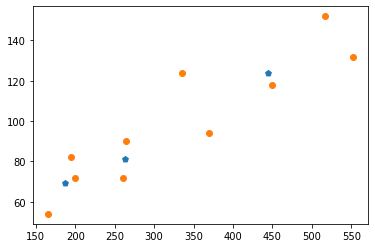

In [ ]:
plt.scatter(centroids[:, 0] , centroids[ :, 1] ,marker='p')
plt.scatter(data[:,0] , data[:,1])